In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Test DFT

We will test the Fourier transform on the simple functions

$$ f(t) = \sin(2 \pi \frac{t}{5}) \, ,$$

of period $P = 5$.

In [2]:
# The period
P = 5

# The function
E = 1/P
def f(t):
    return 10*np.sin(2*E*np.pi*t)

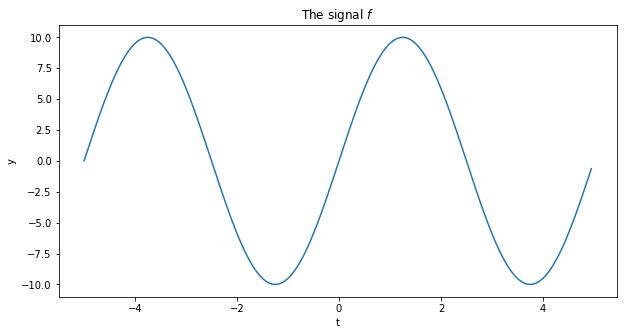

In [3]:
T = np.linspace( -P, P, 200, endpoint = False)
Y = f(T)

plt.figure(figsize=(10, 5))
plt.plot(T, Y)
plt.title("The signal $f$")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

## Fourier series

Let $f$ be a periodic temporal real signal of period $P$. Its Fourier series is

$$ f(t) = \sum_{k = 0}^N c_k e^{- i \frac{2 \pi k}{P} t} = \sum_{k = 0}^N a_k \cos(i \frac{2 \pi k}{P} t) + i b_k \sin( i \frac{2 \pi k}{P} t ) . $$

The frequencies we would sample are

$$ \frac{1}{P} \left\{ 0, 1, \cdots, n\right\} .$$

In [4]:
def FS(f, P, T, k):
    """
    Function that computes the a and b terms of the frequency of index k
    """
    f_cos = lambda t : f(t)*np.cos(2*np.pi*k/P*t)
    a = 2/P*integrate.quad(f_cos, 0, P, limit = 100)[0]
    
    f_sin = lambda t : f(t)*np.sin(2*np.pi*k/P*t)
    b = 2/P*integrate.quad(f_sin, 0, P, limit = 100)[0]
    
    if np.abs(a) < 1e-5:
        a = 0
    if np.abs(b) < 1e-5:
        b = 0
        
    return a, b

def FSC(f, P, T, k):
    """
    Function that computes the term c in the complex form of the Fourier series
    """
    a, b = FS(f, P, T, k)
    c = a + 1j*b
    
    return c

We test our functions on the first frequency $\xi = \frac{1}{P}$:

In [5]:
# Arguments
k = 1

a, b = FS(f, P, T, k)
print("The coefficients (a_k, b_k) of the frequency ", k/P, " are (", a, ", ", b, ")")
c = FSC(f, P, T, k)
print("The complex form is c_k = ", c)

The coefficients (a_k, b_k) of the frequency  0.2  are ( 0 ,  10.000000000000002 )
The complex form is c_k =  10.000000000000002j


What about a frequency that is not part of $f$?

In [6]:
# Arguments
k = 4

a, b = FS(f, P, T, k)
print("The coefficients (a_k, b_k) of the frequency ", k/P, " are (", a, ", ", b, ")")
c = FSC(f, P, T, k)
print("The complex form is c_k = ", c)

The coefficients (a_k, b_k) of the frequency  0.8  are ( 0 ,  0 )
The complex form is c_k =  0j


### Plotting the $a_k$ and $b_k$ coefficients for some frequencies

In [7]:
# Arguments
N = 700

K = np.arange(0, N, step = 1) # Sampling of the frequencies
A = [] # List of a_k
B = [] # List of b_k

for k in K:
    a, b = FS(f, P, T, k)
    A.append(a)
    B.append(b)
    
A = np.array(A)
B = np.array(B)

# The frequencies
Xi = [k/P for k in K]
Xi = np.array(Xi)

/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


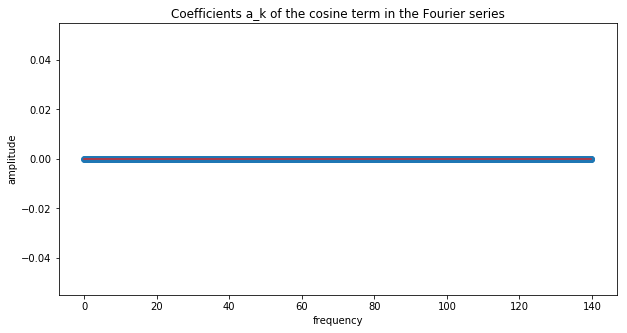

In [8]:
plt.figure(figsize=(10, 5))
plt.stem(Xi, A)
plt.title("Coefficients a_k of the cosine term in the Fourier series")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

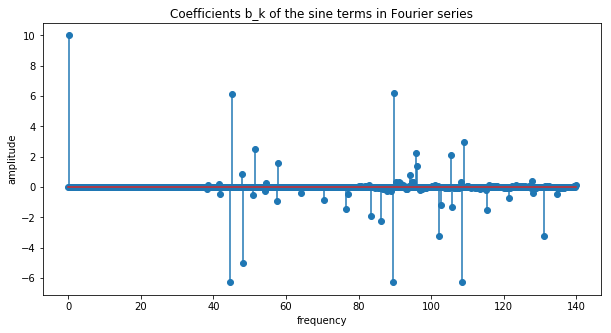

In [9]:
plt.figure(figsize=(10, 5))
plt.stem(Xi, B)
plt.title("Coefficients b_k of the sine terms in Fourier series")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

## DFT

Let $\{ x \} = x_0, x_1, \cdots, x_{N - 1}$ be a sampled signal. The discrete Fourier transform (DFT) gets us the sequence $\{ y \} = y_0, y_1, \cdots, y_{N - 1} \, $ via the formula

$$ y_j = \sum_{k = 0}^{N - 1} x_k e^{- i \frac{2 \pi j}{N} k } .$$

In [10]:
M = 2*N + 1
d = .01 # The sample frequencies

# The sample signal
T = np.linspace(0, M*d, M)
x = f(T)

# The DFT coeffiecents
X = np.fft.fft(x)/M
X_shift = np.fft.fftshift(X)

A_fft = [np.real(0.5*X[0])]
B_fft = [np.imag(0.5*X[0])]

for i in np.arange(1, N):
        a_n = np.real( 0.5*(X[i] + X[N + i]) ) 
        b_n = np.imag( 0.5*(X[N + i] - X[i]) )
        
        A_fft.append(a_n)
        B_fft.append(b_n)
A_fft = np.array(A_fft)
B_fft = np.array(B_fft)

F = np.fft.fftfreq(2*N, d)[:int(M/2)]

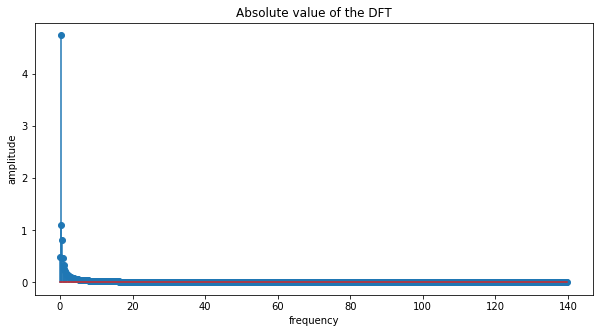

In [18]:
plt.figure(figsize=(10, 5))
plt.stem(Xi, np.abs(X_shift)[N + 1:])
plt.title("Absolute value of the DFT")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

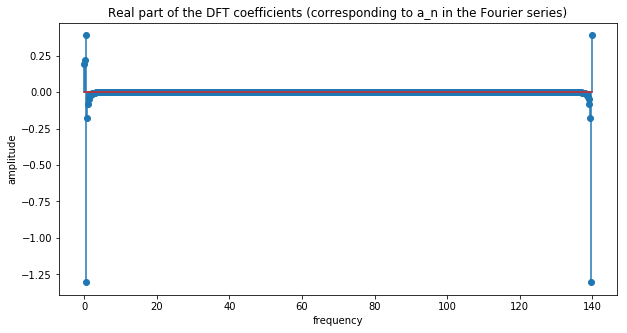

In [15]:
plt.figure(figsize=(10, 5))
plt.stem(Xi, A_fft)
plt.title("Real part of the DFT coefficients (corresponding to a_n in the Fourier series)")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

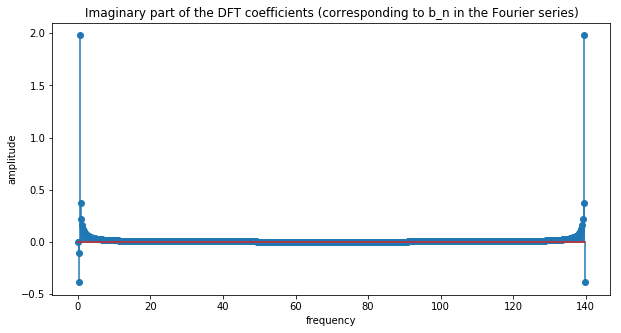

In [16]:
plt.figure(figsize=(10, 5))
plt.stem(Xi, B_fft)
plt.title("Imaginary part of the DFT coefficients (corresponding to b_n in the Fourier series)")
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()